In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('music_spotify.csv', index_col=0)

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(['artist', 'song_title', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

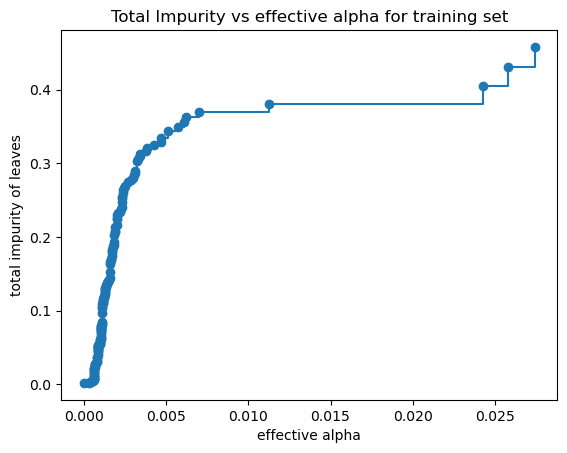

In [5]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [6]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.041999190997992264


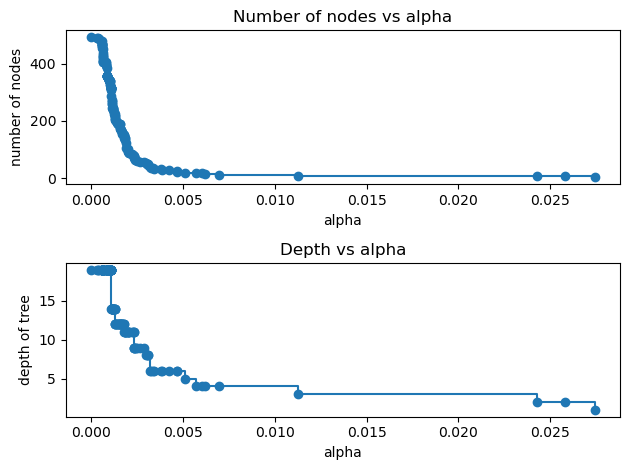

In [7]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

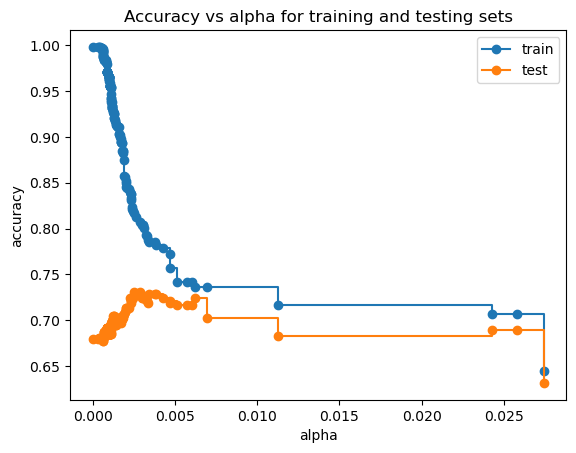

In [8]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
optimal_alpha = 0.00697335

In [14]:
clf = DecisionTreeClassifier(random_state=123, ccp_alpha=optimal_alpha)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00697335, random_state=123)

[Text(0.4, 0.9, 'X[4] <= 0.0\ngini = 0.5\nsamples = 1512\nvalue = [747, 765]'),
 Text(0.2, 0.7, 'X[9] <= 0.101\ngini = 0.462\nsamples = 764\nvalue = [487, 277]'),
 Text(0.1, 0.5, 'gini = 0.374\nsamples = 518\nvalue = [389, 129]'),
 Text(0.3, 0.5, 'gini = 0.479\nsamples = 246\nvalue = [98, 148]'),
 Text(0.6, 0.7, 'X[3] <= 0.192\ngini = 0.454\nsamples = 748\nvalue = [260, 488]'),
 Text(0.5, 0.5, 'gini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.7, 0.5, 'X[7] <= -5.725\ngini = 0.425\nsamples = 702\nvalue = [215, 487]'),
 Text(0.6, 0.3, 'gini = 0.308\nsamples = 463\nvalue = [88, 375]'),
 Text(0.8, 0.3, 'X[12] <= 0.279\ngini = 0.498\nsamples = 239\nvalue = [127, 112]'),
 Text(0.7, 0.1, 'gini = 0.264\nsamples = 64\nvalue = [54, 10]'),
 Text(0.9, 0.1, 'gini = 0.486\nsamples = 175\nvalue = [73, 102]')]

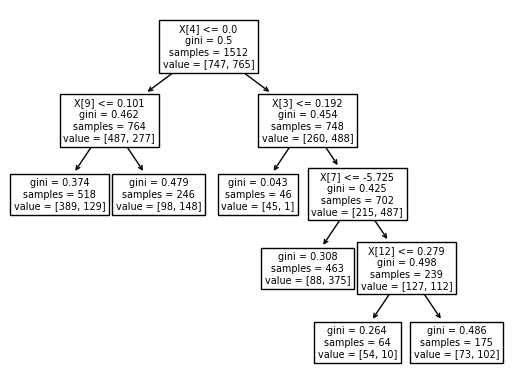

In [15]:
from sklearn import tree
tree.plot_tree(clf)

In [24]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=123, ccp_alpha=optimal_alpha)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.6524703216590315